In [1]:
#!pip install scikit-learn

In [1]:
#wrangling/ etc
import pandas as pd
import numpy as np

#plotting
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

#warnings 
import warnings
warnings.filterwarnings("ignore")

#show me what you got
pd.set_option("display.max_rows", None, "display.max_columns", None)

#ML Models
from sklearn.linear_model import LinearRegression as LM
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn import tree # For plotting the decision tree rules
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.ensemble import RandomForestRegressor as RF
import sklearn.metrics as m #metrics to evaluate model performance

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.naive_bayes import GaussianNB # Classifier 
import math #what it sounds like

#pre-processing
from sklearn.compose import ColumnTransformer 
from sklearn import preprocessing as pp

#combining elemenents into a pipeline
from sklearn.pipeline import Pipeline

#Cross Validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split # Train-test split
from sklearn.model_selection import LeaveOneOut # Leave One Out Cross Validation --> this is inefficient and expensive
from sklearn.model_selection import KFold # K-fold Cross validation --> this is less inefficient than LeaveOneOut
from sklearn.model_selection import GridSearchCV # Cross validation + param.

In [3]:
#data 
test = pd.read_csv("test_data.csv")
train = pd.read_csv("train_data.csv")

#convert land area to log
test['LANDAREA'] = np.log(test['LANDAREA'])
train['LANDAREA'] = np.log(train['LANDAREA'])

In [4]:
#Training Data

#just drop NaNs for now (probably use mean or look at missing plot)
train.dropna(inplace = True)

#create dummies where needed (note, I converted years to dummies to avoid time series)
df_dummies = pd.get_dummies(train, columns=["AC", "EYB", "AYB", "QUALIFIED", "STYLE", "STRUCT", "GRADE", "CNDTN", "EXTWALL", "ROOF", "INTWALL", "USECODE", "HEAT"])   

#Drop
df_dummies.drop(["STYLE_D", "OBJECTID", "SSL", "STRUCT_D", "GRADE_D", "CNDTN_D", "EXTWALL_D", "ROOF_D", "INTWALL_D", "SALEDATE", "GIS_LAST_MOD_DTTM", "HEAT_D"], axis=1, inplace=True)

#outcome var
Y = df_dummies.LN_PRICE.values
#predictor vars
X = df_dummies.drop("LN_PRICE", axis=1)

In [5]:
#Testing data

#just drop NaNs for now (probably use mean or look at missing plot)
test.dropna(inplace = True)

#create dummies where needed (note, I converted years to dummies to avoid time series?)
df_dummies1 = pd.get_dummies(test, columns=["AC", "EYB", "AYB", "QUALIFIED", "STYLE", "STRUCT", "GRADE", "CNDTN", "EXTWALL", "ROOF", "INTWALL", "USECODE", "HEAT"])   

#Actually Drop
df_dummies1.drop(["STYLE_D", "OBJECTID", "SSL", "STRUCT_D", "GRADE_D", "CNDTN_D", "EXTWALL_D", "ROOF_D", "INTWALL_D", "SALEDATE", "GIS_LAST_MOD_DTTM", "HEAT_D"], axis=1, inplace=True)

#outcome var
Y1 = df_dummies1.LN_PRICE.values
#predictor vars
X1 = df_dummies1.drop("LN_PRICE", axis=1)

In [6]:
#look at training data
df_dummies.head()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,YR_RMDL,STORIES,SALE_NUM,GBA,BLDG_NUM,KITCHENS,FIREPLACES,LANDAREA,LN_PRICE,AC_0,AC_N,AC_Y,EYB_1932,EYB_1936,EYB_1937,EYB_1943,EYB_1944,EYB_1945,EYB_1946,EYB_1947,EYB_1948,EYB_1949,EYB_1950,EYB_1951,EYB_1952,EYB_1953,EYB_1954,EYB_1955,EYB_1956,EYB_1957,EYB_1958,EYB_1959,EYB_1960,EYB_1961,EYB_1962,EYB_1963,EYB_1964,EYB_1965,EYB_1966,EYB_1967,EYB_1968,EYB_1969,EYB_1970,EYB_1971,EYB_1972,EYB_1973,EYB_1974,EYB_1975,EYB_1976,EYB_1977,EYB_1978,EYB_1979,EYB_1980,EYB_1981,EYB_1982,EYB_1983,EYB_1984,EYB_1985,EYB_1986,EYB_1987,EYB_1988,EYB_1989,EYB_1990,EYB_1991,EYB_1992,EYB_1993,EYB_1994,EYB_1995,EYB_1996,EYB_1997,EYB_1998,EYB_1999,EYB_2000,EYB_2001,EYB_2002,EYB_2003,EYB_2004,EYB_2005,EYB_2006,EYB_2007,EYB_2008,EYB_2009,EYB_2010,EYB_2011,EYB_2012,EYB_2013,EYB_2014,EYB_2015,EYB_2016,EYB_2017,AYB_0.0,AYB_1765.0,AYB_1776.0,AYB_1790.0,AYB_1794.0,AYB_1800.0,AYB_1801.0,AYB_1802.0,AYB_1803.0,AYB_1805.0,AYB_1807.0,AYB_1810.0,AYB_1811.0,AYB_1812.0,AYB_1813.0,AYB_1815.0,AYB_1816.0,AYB_1819.0,AYB_1820.0,AYB_1822.0,AYB_1825.0,AYB_1830.0,AYB_1833.0,AYB_1834.0,AYB_1840.0,AYB_1842.0,AYB_1846.0,AYB_1848.0,AYB_1849.0,AYB_1850.0,AYB_1852.0,AYB_1853.0,AYB_1854.0,AYB_1855.0,AYB_1857.0,AYB_1858.0,AYB_1860.0,AYB_1861.0,AYB_1862.0,AYB_1863.0,AYB_1865.0,AYB_1867.0,AYB_1868.0,AYB_1869.0,AYB_1870.0,AYB_1872.0,AYB_1873.0,AYB_1874.0,AYB_1875.0,AYB_1876.0,AYB_1877.0,AYB_1878.0,AYB_1879.0,AYB_1880.0,AYB_1881.0,AYB_1882.0,AYB_1883.0,AYB_1884.0,AYB_1885.0,AYB_1886.0,AYB_1887.0,AYB_1888.0,AYB_1889.0,AYB_1890.0,AYB_1891.0,AYB_1892.0,AYB_1893.0,AYB_1894.0,AYB_1895.0,AYB_1896.0,AYB_1897.0,AYB_1898.0,AYB_1899.0,AYB_1900.0,AYB_1901.0,AYB_1902.0,AYB_1903.0,AYB_1904.0,AYB_1905.0,AYB_1906.0,AYB_1907.0,AYB_1908.0,AYB_1909.0,AYB_1910.0,AYB_1911.0,AYB_1912.0,AYB_1913.0,AYB_1914.0,AYB_1915.0,AYB_1916.0,AYB_1917.0,AYB_1918.0,AYB_1919.0,AYB_1920.0,AYB_1921.0,AYB_1922.0,AYB_1923.0,AYB_1924.0,AYB_1925.0,AYB_1926.0,AYB_1927.0,AYB_1928.0,AYB_1929.0,AYB_1930.0,AYB_1931.0,AYB_1932.0,AYB_1933.0,AYB_1934.0,AYB_1935.0,AYB_1936.0,AYB_1937.0,AYB_1938.0,AYB_1939.0,AYB_1940.0,AYB_1941.0,AYB_1942.0,AYB_1943.0,AYB_1944.0,AYB_1945.0,AYB_1946.0,AYB_1947.0,AYB_1948.0,AYB_1949.0,AYB_1950.0,AYB_1951.0,AYB_1952.0,AYB_1953.0,AYB_1954.0,AYB_1955.0,AYB_1956.0,AYB_1957.0,AYB_1958.0,AYB_1959.0,AYB_1960.0,AYB_1961.0,AYB_1962.0,AYB_1963.0,AYB_1964.0,AYB_1965.0,AYB_1966.0,AYB_1967.0,AYB_1968.0,AYB_1969.0,AYB_1970.0,AYB_1971.0,AYB_1972.0,AYB_1973.0,AYB_1974.0,AYB_1975.0,AYB_1976.0,AYB_1977.0,AYB_1978.0,AYB_1979.0,AYB_1980.0,AYB_1981.0,AYB_1982.0,AYB_1983.0,AYB_1984.0,AYB_1985.0,AYB_1986.0,AYB_1987.0,AYB_1988.0,AYB_1989.0,AYB_1990.0,AYB_1991.0,AYB_1992.0,AYB_1993.0,AYB_1994.0,AYB_1995.0,AYB_1996.0,AYB_1997.0,AYB_1999.0,AYB_2000.0,AYB_2001.0,AYB_2002.0,AYB_2003.0,AYB_2004.0,AYB_2005.0,AYB_2006.0,AYB_2007.0,AYB_2008.0,AYB_2009.0,AYB_2010.0,AYB_2011.0,AYB_2012.0,AYB_2015.0,QUALIFIED_Q,QUALIFIED_U,STYLE_0.0,STYLE_1.0,STYLE_2.0,STYLE_3.0,STYLE_4.0,STYLE_5.0,STYLE_6.0,STYLE_7.0,STYLE_8.0,STYLE_9.0,STYLE_10.0,STYLE_12.0,STYLE_13.0,STYLE_14.0,STYLE_15.0,STYLE_99.0,STRUCT_0.0,STRUCT_1.0,STRUCT_2.0,STRUCT_4.0,STRUCT_5.0,STRUCT_6.0,STRUCT_7.0,STRUCT_8.0,GRADE_0.0,GRADE_2.0,GRADE_3.0,GRADE_4.0,GRADE_5.0,GRADE_6.0,GRADE_7.0,GRADE_8.0,GRADE_9.0,GRADE_10.0,GRADE_11.0,GRADE_12.0,CNDTN_0.0,CNDTN_1.0,CNDTN_2.0,CNDTN_3.0,CNDTN_4.0,CNDTN_5.0,CNDTN_6.0,EXTWALL_0.0,EXTWALL_1.0,EXTWALL_2.0,EXTWALL_3.0,EXTWALL_4.0,EXTWALL_5.0,EXTWALL_6.0,EXTWALL_7.0,EXTWALL_10.0,EXTWALL_11.0,EXTWALL_12.0,EXTWALL_13.0,EXTWALL_14.0,EXTWALL_15.0,EXTWALL_17.0,EXTWALL_18.0,EXTWALL_19.0,EXTWALL_20.0,EXTWALL_21.0,EXTWALL_22.0,EXTWALL_23.0,EXTWALL_24.0,ROOF_0.0,ROOF_1.0,ROOF_2.0,ROOF_3.0,ROOF_4.0,ROOF_5.0,ROOF_6.0,ROOF_7.0,ROOF_8.0,ROOF_9.0,ROOF_10.0,ROOF_11.0,ROOF_13.0,ROOF_14.0,ROOF_15.0,INTWALL_0.0,INTWALL_1.0,INTWALL_2.0,INTWALL_3.0,INTWALL_4.0,INTWALL_5.0,INTWALL_6.0,INTWALL_7.0,INTWALL_8.0,INTWALL_9.0,INTWALL_10.0,INTWALL_11.0,USECODE_11,USECODE_12,USECODE_13,USECODE_15,USECODE_19,USECODE_23,USECODE_24,USECODE_39,H

In [7]:
#pre-processing
# Scale data 
scaler = pp.MinMaxScaler()
col_names = list(X)
X = scaler.fit_transform(X)

# Convert back into data frame
X = pd.DataFrame(X,columns=col_names)

# Scale test data 
scaler = pp.MinMaxScaler()
col_names = list(X1)
X1 = scaler.fit_transform(X1)

# Convert back into data frame
X1 = pd.DataFrame(X1,columns=col_names)

In [8]:
#create metric
use_metrics = ["neg_mean_squared_error"]

In [9]:
# (1) Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

# (2) Next specify the preprocessing steps
preprocess = ColumnTransformer(transformers=[('num', pp.MinMaxScaler(), ['BATHRM','ROOMS','LANDAREA'])])


# (3) Next Let's create our model pipe (note for the model we leave none as a placeholder)
pipe = Pipeline(steps=[('pre_process', preprocess),
                       ('model',None)])


# (4) Specify the models and their repsective tuning parameters. 
# Note the naming convention here to reference the model key
search_space = [
    # Linear Model
    {'model' : [LM()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[10,15,20,25, 30, 50, 75, 100]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DTree()],
     'model__max_depth':[1,2,3,5, 6, 7, 8, 9]},
    
    # The Bagging decision tree model 
    {'model': [Bag()]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
     'model__max_depth':[1,2,3, 4, 5],
     'model__n_estimators':[500,1000,1250]},
]


# (5) Put it all together in the grid search
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=4)

# (6) Fit the model to the training data
search.fit(X,Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=Pipeline(steps=[('pre_process',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['BATHRM',
                                                                          'ROOMS',
                                                                          'LANDAREA'])])),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [LinearRegression()]},
                         {'model': [KNeighborsRegressor(n_neighbors=75)],
                          'model__n_neighbors': [10, 15, 20, 25, 30, 50, 75,
                                                 100]},
                         {'model': [DecisionTreeRegressor()],
                          'model__max_depth

In [10]:
search.best_score_ # Mean out-of-sample (CV) error

-0.44974049601185717

In [11]:
search.best_params_

{'model': KNeighborsRegressor(n_neighbors=75), 'model__n_neighbors': 75}

In [161]:
# Predict() method will use the best model out of the scan
pred_y = search.predict(X1)

m.mean_squared_error(Y1,pred_y)

0.4162968929385014

In [162]:
m.r2_score(Y1,pred_y)

0.3130471662335039

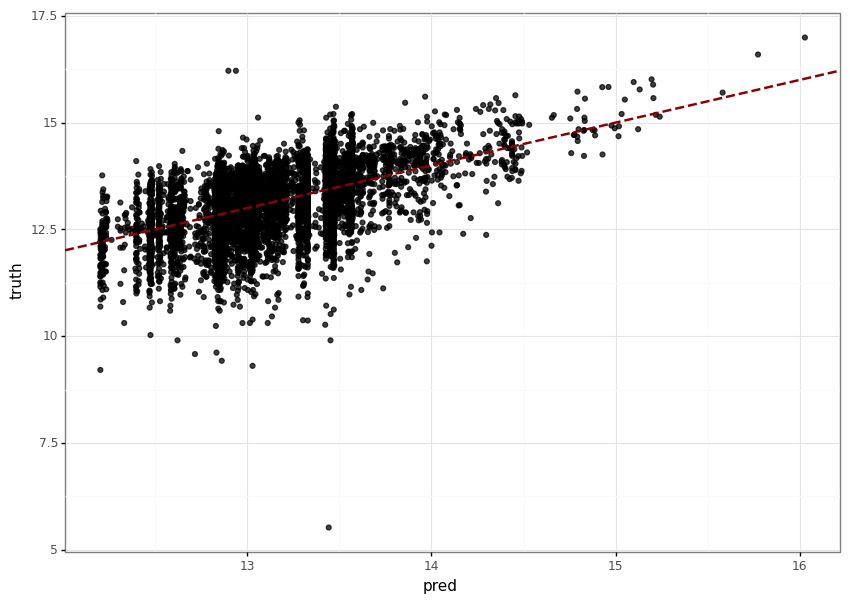

<ggplot: (139072404140)>

In [163]:
(
    ggplot(pd.DataFrame(dict(pred=pred_y,truth=Y1)),
          aes(x='pred',y="truth")) +
    geom_point(alpha=.75) +
    geom_abline(linetype="dashed",color="darkred",size=1) +
    theme_bw() +
    theme(figure_size=(10,7))
)

### Results

The model above produced an MSE of roughly .41 and an R^2 value of .31. Based on these results it is likely that a better model must be constructed for future predictions. Specifically, narrowing down on more relevant variables may improve the model's accuracy. 